# Projekt Analiza Danych
## Aleksander Golus 240665, 5I01 23/24
## Drug Consumption (Quantified) Data Set - Informacje projektowe
[Link do setu danych](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29)
- Set danych zawiera informacje o konsumpcji narkotyków i używek (dalej nazywanych narkotykami) przez osoby w różnym wieku i płci
- Dane zawierają 12 kolumn z danymi osobowymi oraz 18 kolumn z informacjami o konsumpcji narkotyków
- Kolumny z danymi osobowymi zawierają informacje o wieku, płci, wykształceniu, pochodzeniu i innych
- Kolumny z informacjami o konsumpcji narkotyków zawierają informacje o konsumpcji 18 różnych substancji
- Dane są w formie liczbowej, gdzie 0 oznacza brak konsumpcji, a liczby od 1 do 7 oznaczają różne poziomy konsumpcji

## Cel projektu
Cel projektu to analiza danych, w celu znalezienia zależności między konsumpcją narkotyków a danymi osobowymi. Na podstawie tych zależności chcemy stworzyć model, który będzie przewidywał podatność na konsumpcję narkotyków na podstawie danych osobowych.

## Znaczenie danych
Dane można podzielić na trzy kategorie:
- Dane osobowe
- Dane o osobowości
- Dane o konsumpcji narkotyków

### Dane osobowe
#### Age - wiek
| Wartość | Znaczenie | Część |
| --- | --- | --- |
| -0.95197 | 18-24 | 34.11% |
| -0.07854 | 25-34 | 25.52% |
| 0.49788 | 35-44 | 18.89% |
| 1.09449 | 45-54 | 15.60% |
| 1.82213 | 55-64 | 4.93% |
| 2.59171 | 65+ | 0.95% |

#### Gender - Płeć
| Wartość  | Znaczenie | Część  |
|----------| --- |--------|
| -0.48246 | Mężczyzna | 49.97% |
| 0.48246 | Kobieta | 50.03% |

#### Education - Wykształcenie
| Wartość | Znaczenie                            | Część  |
| --- |--------------------------------------|--------|
| -2.43591 | Opuścił szkołę przed 16 rokiem życia | 1.49%  |
| -1.73790 | Opuścił szkołę w wieku 16-17 lat     | 5.25%  |
| -1.43719 | Opuścił szkołę w wieku 17-18 lat     | 1.59%  |
| -1.22751 | Opuścił szkołę w wieku 18+ lat       | 5.31%  |
| -0.61113 | Ukończył szkołę lub uniwersytet bez dyplomu | 26.84% |
| -0.05921 | Dyplom zawodowy                     | 14.32% |
| 0.45468 | Dyplom uniwersytecki                | 25.46% |
| 1.16365 | Dyplom magistra                     | 15.01% |
| 1.98437 | Dyplom doktora                      | 4.72%  |

#### Country - Kraj pochodzenia
| Wartość | Znaczenie   | Część  |
| --- |-------------| ------|
| -0.09765 | Australia   | 2.86%  |
| 0.24923 | Kanada      | 4.62%  |
| -0.46841 | Nowa Zelandia | 0.27%  |
| -0.28519 | Inny       | 6.26%  |
| 0.21128 | Irlandia    | 1.06%  |
| 0.96082 | UK         | 55.38% |
| -0.57009 | USA | 29.55% |

#### Ethnicity - Etniczność
| Wartość | Znaczenie                | Część  |
| --- |--------------------------| ------|
| -0.50212 | Azjata                   | 1.38%  |
| -1.10702 | Czarny                   | 1.75%  |
| 1.90725 | Mieszaniec Czarny/Azjata | 0.16%  |
| 0.12600 | Mieszaniec Biały/Azjata  | 1.06%  |
| -0.22166 | Mieszaniec Biały/Czarny  | 1.06%  |
| 0.11440 | Inny                     | 3.34%  |
| -0.31685 | Biały                    |  91.25% |

### Dane o osobowości
Dane o osobowości zostały zebrane za pomocą testu osobowości NEO-FFI-R. Szczegółowe informacje o teście można znaleźć [tutaj](https://en.wikipedia.org/wiki/NEO_Personality_Inventory). Jest to skrócona wersja testu osobowości NEO-PI-R, która składa się z 60 pytań. Wyniki testu są znormalizowane i nie wymagają interpretacji.

### Dane o konsumpcji narkotyków
Dane o konsumpcji narkotyków zostały zebrane za pomocą testu konsumpcji narkotyków. Test ten składa się z 18 pytań, które dotyczą konsumpcji różnych narkotyków. Wyniki testu są przedstawione w formie liczbowej, gdzie 0 oznacza brak konsumpcji, a liczby od 1 do 7 oznaczają różne poziomy konsumpcji.

| Wartość | Znaczenie                       |
| --- |---------------------------------|
| CL0 | Nigdy nie konsumował            |
| CL1 | Konsumował ponad 10 lat temu    |
| CL2 | Konsumował w ostatniej dekadzie |
| CL3 | Konsumował w ostatnim roku      |
| CL4 | Konsumował w ostatnim miesiącu  |
| CL5 | Konsumował w ostatnim tygodniu  |
| CL6 | Konsumował w ostatnim dniu      |


## Wczytanie danych

In [53]:
import pandas as pd

def read_data():
    return pd.read_csv('drug_consumption.csv', delimiter=';')

data = read_data()
data.head()

,ID,neuroticism,extraversion,openness to experience,agreeableness,conscientiousness,impulsivity,sensation seeking,level of education,age,...,ecstasy,heroin,ketamine,legal highs,LSD,methadone,mushrooms,nicotine,volatile substance abuse,semeron
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Obróbka danych
Dane zawierające informacje o konsumpcji narkotyków są zapisane w formie tekstowej. Aby ułatwić analizę, zamieniamy je na wartości liczbowe. Nie potrzebujemy również kolumny 'ID', więc ją usuwamy.

In [54]:
def map_consumption_values(data):
    consumption_columns = ['alcohol','amphetamines','amyl nitrite','benzodiazepine','cannabis','chocolate','cocaine','caffeine','crack','ecstasy','heroin','ketamine','legal highs','LSD','methadone','mushrooms','nicotine','volatile substance abuse','semeron']
    consumption_values = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    for column in consumption_columns:
        data[column] = data[column].map({value: index for index, value in enumerate(consumption_values)})
    data = data.drop(columns=['ID'])
    return data

data = map_consumption_values(data)
data.head()

,neuroticism,extraversion,openness to experience,agreeableness,conscientiousness,impulsivity,sensation seeking,level of education,age,gender,...,ecstasy,heroin,ketamine,legal highs,LSD,methadone,mushrooms,nicotine,volatile substance abuse,semeron
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0


## Wstępna analiza danych
Z racji takiej, że ilość informacji w danych jest bardzo duża, zaczniemy od wstępnej analizy danych. Sprawdzimy jakie są rozkłady danych, jakie są korelacje między danymi oraz jakie są zależności między danymi osobowymi a konsumpcją narkotyków.

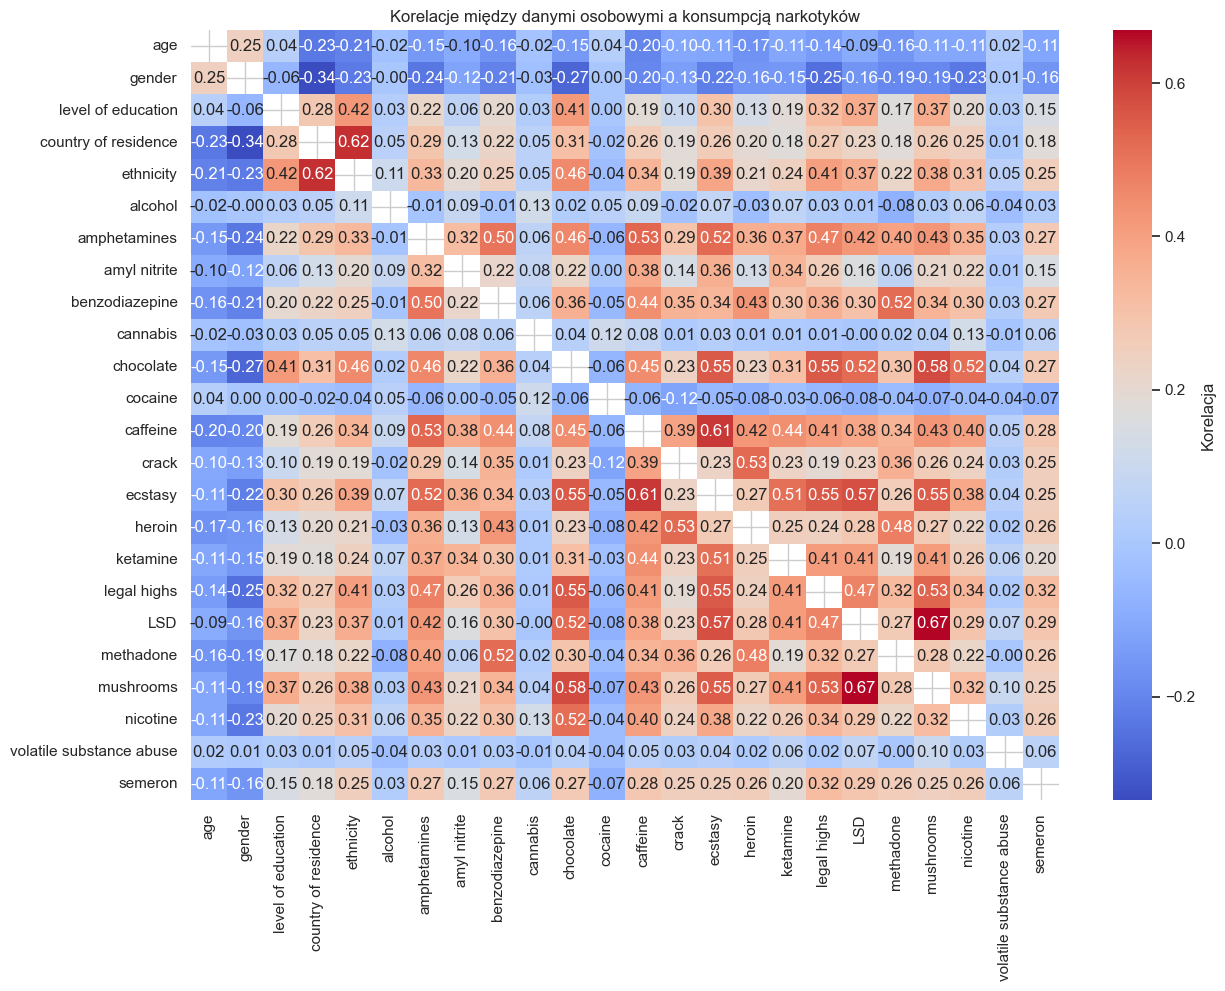

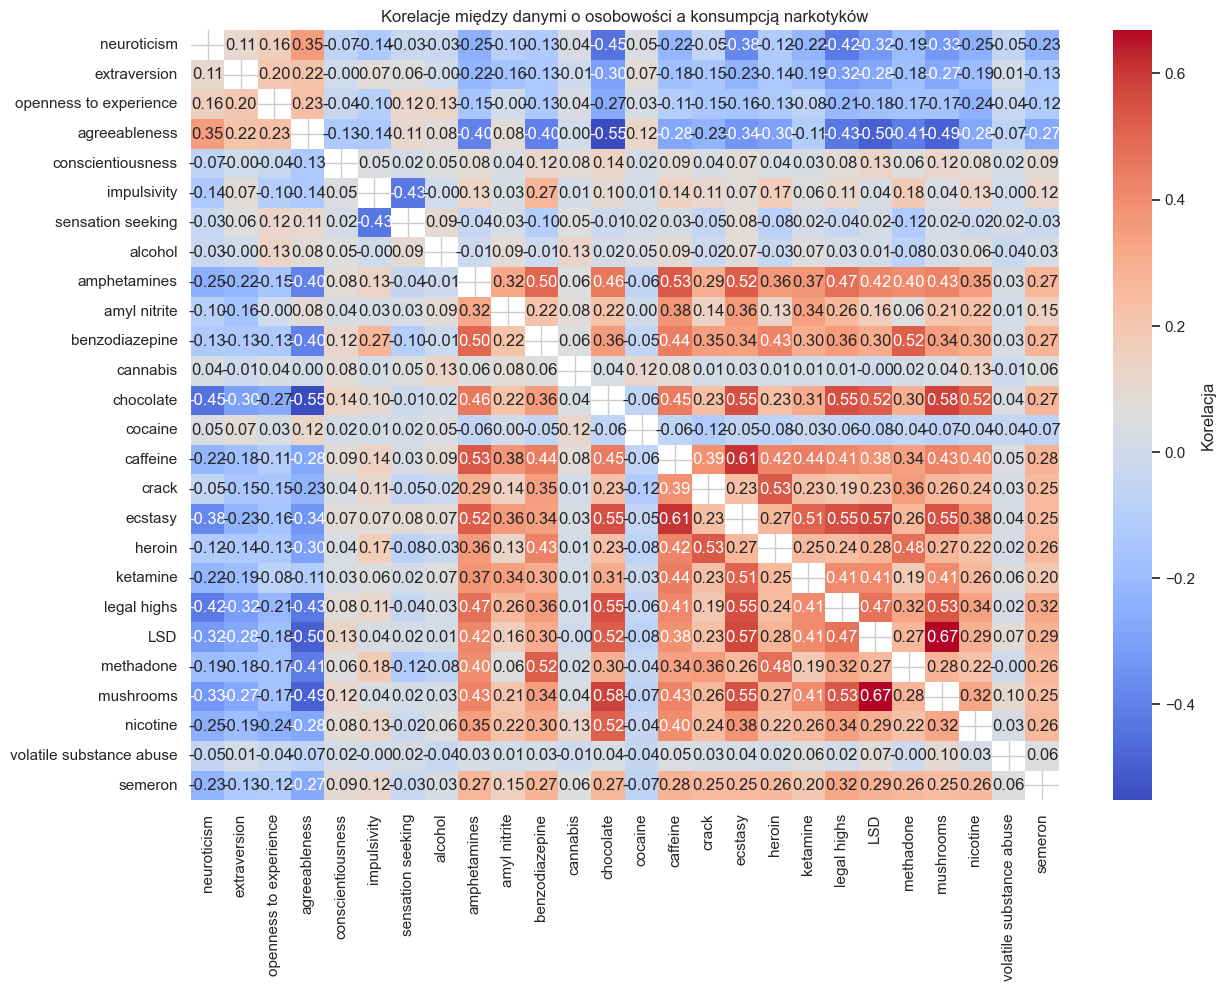

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

personal_information_data_columns = ['age', 'gender', 'level of education', 'country of residence', 'ethnicity']
personality_data_columns = ['neuroticism', 'extraversion', 'openness to experience', 'agreeableness', 'conscientiousness', 'impulsivity', 'sensation seeking']

consumption_data_columns = ['alcohol','amphetamines','amyl nitrite','benzodiazepine','cannabis','chocolate','cocaine','caffeine','crack','ecstasy','heroin','ketamine','legal highs','LSD','methadone','mushrooms','nicotine','volatile substance abuse','semeron']

personal_info_and_drug_data = data[personal_information_data_columns + consumption_data_columns]
personality_and_drug_data = data[personality_data_columns + consumption_data_columns]

# Korelacje
correlation_matrix_personal_info_drug = personal_info_and_drug_data.corr()
correlation_matrix_personality_drug = personality_and_drug_data.corr()

# Usunięcie korelacji między tą samą kolumną w 
np.fill_diagonal(correlation_matrix_personal_info_drug.values, None)
np.fill_diagonal(correlation_matrix_personality_drug.values, None)

# Wizualizacja
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_personal_info_drug, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Korelacja'} )
plt.title('Korelacje między danymi osobowymi a konsumpcją narkotyków')
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_personality_drug, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Korelacja'} )
plt.title('Korelacje między danymi o osobowości a konsumpcją narkotyków')
plt.show()

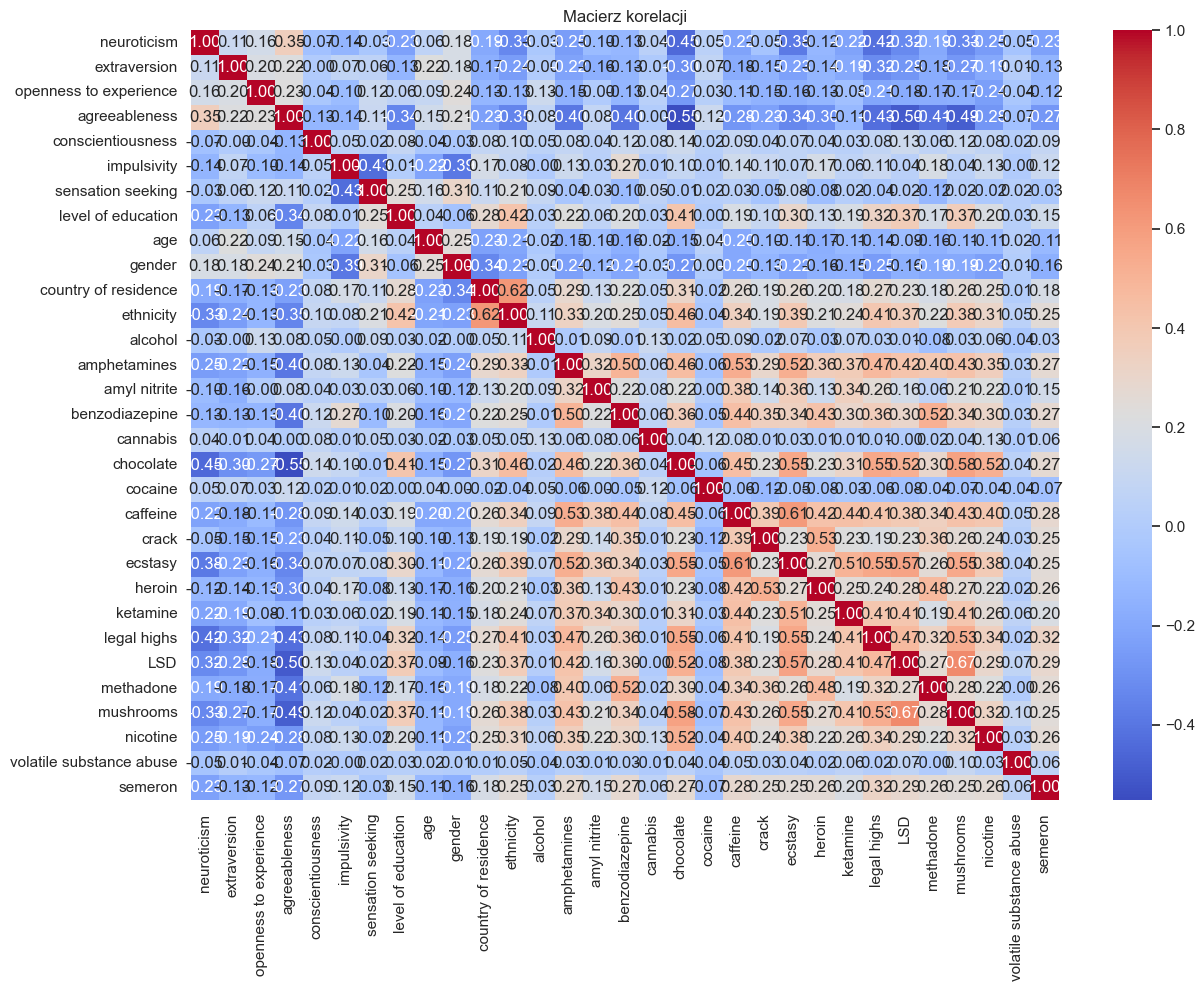

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix():
    correlation_matrix = data.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Macierz korelacji')
    plt.show()
    
plot_correlation_matrix()

## Wnioski z macierzy korelacji